In [ ]:
include("AutomDiff.jl")
using AD

In [ ]:
derivadas = (
[:exp,:(exp(x.fun))],
[:sqrt,:(1/(2*sqrt(x.fun)))],
[:log,:(1/x.fun)],
[:sin,:(cos(x.fun))],
[:cos,:(-sin(x.fun))],
[:tan,:(sec(x.fun)^2)],
[:cot,:(-csc(x.fun)^2)],
[:sec,:(sec(x.fun)*tan(x.fun))],
[:csc,:(-csc(x.fun)*cot(x.fun))],
[:sinh,:(cosh(x.fun))],
[:cosh,:(sinh(x.fun))],
[:tanh,:(sec(x.fun)^2)],
[:coth,:(-csch(x.fun)^2)],
[:sech,:(sech(x.fun)*tanh(x.fun))],
[:csch,:(-csch(x.fun)*coth(x.fun))],
[:asin,:(1/sqrt(1-(x.fun^2)))],
[:acos,:(-1/sqrt(1-(x.fun^2)))],
[:atan,:(1/sqrt(1+(x.fun^2)))],
[:acot,:(-1/(1+(x.fun^2)))],
[:asec,:(1/(abs(x.fun)*sqrt((x.fun^2)-1)))],
[:acsc,:(-1/(abs(x.fun)*sqrt((x.fun^2)-1)))],
[:asinh,:(1/sqrt((x.fun^2)+1))],
[:acosh,:(1/sqrt((x.fun^2)-1))],
[:atanh,:(1/sqrt(1-(x.fun^2)))],
[:acoth,:(1/sqrt(1-(x.fun^2)))],
[:asech,:(1/(1-(x.fun^2)))],
[:acsch,:(-1/(abs(x.fun)*sqrt((x.fun^2)+1)))],
[:sinc,:(cosc(x.fun))],
)

In [6]:
for op in derivadas
  eval(quote
        import Base:$(op[1])
        ($(op[1]))(x::Dual) = Dual( $(op[1])(x.fun) , x.der*$(op[2]) ) 
  end)
end

In [166]:
f(x)=sin(x^3-(2/(x^6)))
f(xdual(2))

0.9055783620066239 + -35.631036616307746e

In [110]:
f(x)=sin(x^3-(2/(x^6)))
A = linspace(1,5,1000)
B=Float64[]

for a in A
    push!(B,f(xdual(a)).der)
end
#Talvez seria util implementar Duales con Arrys

In [ ]:
Pkg.add("UnicodePlots")
Pkg.add("PyPlot")

In [113]:
using UnicodePlots
myPlot = lineplot(A,B, title="My Plot", border=:dotted)

                           My Plot
          ⡤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⢤ 
    10000 ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣼⣼⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣿⢸⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣴⣷⣿⣿⢸⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣤⣶⢸⣿⣿⣿⣿⣿⢸⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⢀⣀⣠⣤⣶⢸⣿⣿⣿⣿⢸⣿⣿⣿⣿⣿⢸⣿⣿⣿⢸ 
          ⡇⠤⠤⠤⠤⠶⠶⠦⠶⠴⠶⠶⠶⠶⠶⠶⠶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠛⠛⠟⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠋⢻⣿⣿⣿⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⢻⣿⣿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⢿⣿⣿⢸ 
          ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⢸ 
   -10000 ⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢸ 
          ⠓⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠒⠚ 
          1                                    

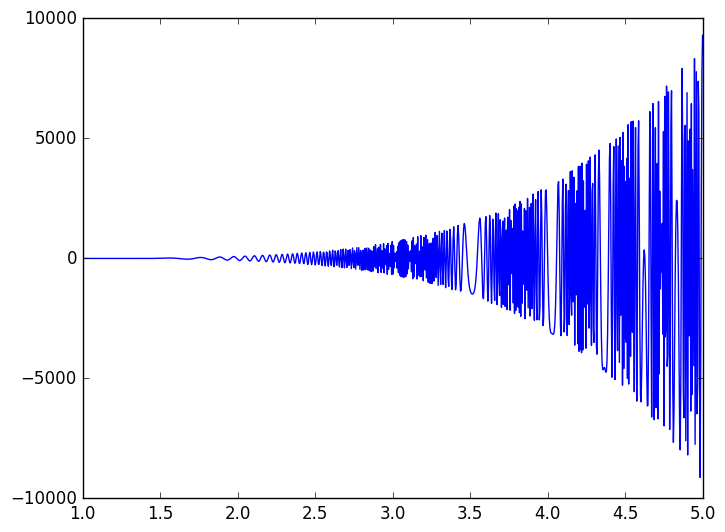

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000013D14E80>

In [116]:
using PyPlot
plot(A,B)

In [145]:
function newton(f,x0=0,n=10)
    xn=x0
    for i = 1:n
        d=f(xdual(xn))
        xn-=d.fun/d.der
    end
    xn
end

newton (generic function with 3 methods)

In [163]:
f(x)=(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)
g(x)=x*sin(2x)
print("f(2.2)\t-> ",newton(f,2.2))
print("\nf(2.45)\t-> ",newton(f,2.45))
print("\ng(0.7)\t-> ",newton(g,0.7))

f(2.2)	-> 2.0
f(2.45)	-> 6.0
g(0.7)	-> 0.0002615203939528769